# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
from sklearn.metrics import pairwise_distances

In [50]:
a = pairwise_distances(raitings, metric='cosine')
# проверим метрику 'cosine' на примере первых двух векторов
print(a[:2,:2])

[[0.         0.17397081]
 [0.17397081 0.        ]]


In [49]:
# посчитаем сами.  и проверим с метрикой

# длина
l0 = np.sqrt((raitings[0]**2).sum())
l1 = np.sqrt((raitings[1]**2).sum())
# косинус
cosine  = (raitings[0] @ raitings[1]) / (l0*l1)
alpha_ = np.arccos(cosine)
cosine, 1-cosine

(0.8260291914926011, 0.17397080850739888)

#### стало быть 'cosine' считает 1-cos(между векторами). 
Выходит нужно в полученной матрице 'pairwise_distances' искать минимальное значение - оно будет соответствовать cos(alpha)=1 или alpha = 0 - то есть векторы сонаправлены 

<AxesSubplot:>

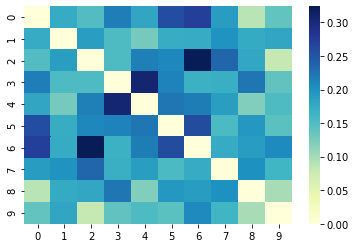

In [51]:
# посмотрим на полученну матрицу:
import seaborn as sns
sns.heatmap(a,cmap="YlGnBu")

In [52]:
# если мы будем искать минимумы, то найдем нули. Заменим ноль на что то существенное например 1
np.place(a,a==0,1)

<AxesSubplot:>

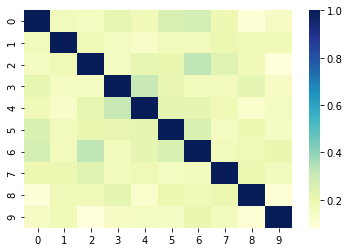

In [53]:
# проверим
sns.heatmap(a,cmap="YlGnBu")

In [54]:
#находим минимумы:
similar_array = a.argmin(axis=1)
similar_array

array([8, 4, 9, 9, 8, 9, 3, 5, 0, 2], dtype=int64)

In [55]:
#сопоставляем с векторами:
similar_array = list(enumerate(similar_array))
similar_array

[(0, 8),
 (1, 4),
 (2, 9),
 (3, 9),
 (4, 8),
 (5, 9),
 (6, 3),
 (7, 5),
 (8, 0),
 (9, 2)]

In [37]:
#Job is done!

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [56]:
# Будем делать через методы снижения размерности Метод Главных Компонент (PCA), проверять будем метрикой median absolute error и MSE
# Импортируем
from sklearn.decomposition import PCA
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

In [67]:
# посмотрим на главные компоненты
np.set_printoptions(formatter={'float_kind': '{:.2f}'.format})
a = raitings
a= np.resize(a,(15,15))
np.linalg.eig(a) 

(array([ 8.74700053e+01+0.00000000e+00j, -8.26467348e+00+0.00000000e+00j,
         9.06861682e+00+0.00000000e+00j, -2.74389547e+00+5.36310283e+00j,
        -2.74389547e+00-5.36310283e+00j,  5.14806531e+00+1.85850516e+00j,
         5.14806531e+00-1.85850516e+00j,  1.72608804e-01+4.02604405e+00j,
         1.72608804e-01-4.02604405e+00j, -4.27505889e-01+0.00000000e+00j,
         5.52858749e-14+0.00000000e+00j, -5.73848351e-15+5.78086523e-15j,
        -5.73848351e-15-5.78086523e-15j,  5.62375548e-17+8.09529500e-16j,
         5.62375548e-17-8.09529500e-16j]),
 array([[-0.26648658+0.00000000e+00j, -0.16243971+0.00000000e+00j,
         -0.30736687+0.00000000e+00j, -0.05242368-5.12027782e-02j,
         -0.05242368+5.12027782e-02j,  0.07111041-9.43597776e-02j,
          0.07111041+9.43597776e-02j, -0.00152088-1.27890698e-01j,
         -0.00152088+1.27890698e-01j,  0.03137791+0.00000000e+00j,
         -0.00466132+0.00000000e+00j,  0.03317817-1.25243200e-02j,
          0.03317817+1.25243200e-02j,

первые три компонента имеют максимальное значение. проверим сколько нужно на самом деле

In [91]:
tester = PCA(n_components=9,svd_solver='full' )
a = tester.fit_transform(raitings)
a_ = tester.inverse_transform(a)
#metrics
mse = mean_squared_error(raitings,a_)
mae = median_absolute_error(raitings,a_)
mse, mae

(7.350868868484463e-30, 1.9984014443252818e-15)

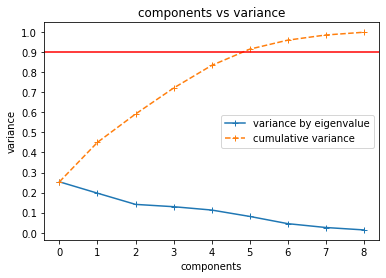

In [112]:
plt.plot(tester.explained_variance_ratio_,'+-', label = 'variance by eigenvalue')
plt.plot(tester.explained_variance_ratio_.cumsum(),'+--',label = 'cumulative variance')
plt.axhline(.9,color='r')
plt.legend()
plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('components')
plt.ylabel('variance')
plt.title('components vs variance');

Видно, что первые пять собственных компонентов снижают дисперсию на 90%  

Посмотрим как выглядят основные компоненты и   
проверим на Mean Square Error (MSE) и median absolute error (MAE)

In [93]:
tester.singular_values_

array([16.92, 14.91, 12.62, 12.09, 11.28, 9.57, 7.13, 5.39, 3.94])

In [79]:
import optuna

def objective(trial):
    n = trial.suggest_int('n', 1, 9 )
    
    tester = PCA(n_components=n ,svd_solver='full' )
    a = tester.fit_transform(raitings)
    a_ = tester.inverse_transform(a)
    
    #metrics
    mse = mean_squared_error(raitings,a_)
    mae = median_absolute_error(raitings,a_)
    return mae

study = optuna.create_study()
study.optimize(objective, n_trials=10)

study.best_params

[I 2021-06-18 11:59:12,957] A new study created in memory with name: no-name-b5d0d492-b187-4227-b6d8-14ff3a4fccef
[I 2021-06-18 11:59:12,957] Trial 0 finished with value: 1.5123253608358054 and parameters: {'n': 2}. Best is trial 0 with value: 1.5123253608358054.
[I 2021-06-18 11:59:12,967] Trial 1 finished with value: 1.1287437973838526 and parameters: {'n': 4}. Best is trial 1 with value: 1.1287437973838526.
[I 2021-06-18 11:59:12,967] Trial 2 finished with value: 0.2840695916688586 and parameters: {'n': 8}. Best is trial 2 with value: 0.2840695916688586.
[I 2021-06-18 11:59:12,977] Trial 3 finished with value: 1.9984014443252818e-15 and parameters: {'n': 9}. Best is trial 3 with value: 1.9984014443252818e-15.
[I 2021-06-18 11:59:12,977] Trial 4 finished with value: 0.2840695916688586 and parameters: {'n': 8}. Best is trial 3 with value: 1.9984014443252818e-15.
[I 2021-06-18 11:59:12,977] Trial 5 finished with value: 0.3537171054877469 and parameters: {'n': 7}. Best is trial 3 with v

{'n': 9}

MSE после 5 компоненты выдает такой же результат, как для 8 компонентов.  
MAE после 3 компонентов выдает такой же результат, как для 9 компонентов.

Стало быть, можно сокращать количество компонентов до 5 с минимальной потерей информации:

In [115]:
tester = PCA(n_components=5,svd_solver='full' )
decreased_components = tester.fit_transform(raitings)
decreased_components

array([[-5.31, 1.93, -4.93, 2.70, 5.50],
       [2.88, 2.72, 1.41, 7.26, -4.50],
       [-4.94, -6.69, -0.95, 3.62, -0.69],
       [5.15, -6.28, -4.66, 1.09, -1.01],
       [-1.37, 7.54, 4.01, 2.13, -0.16],
       [2.65, -3.77, 8.58, -1.47, 1.67],
       [8.62, 3.79, -4.03, -4.38, -3.14],
       [5.40, -1.02, 1.01, -1.90, 6.55],
       [-5.78, 5.30, -1.48, -3.71, 0.21],
       [-7.28, -3.52, 1.03, -5.35, -4.43]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [116]:
import sympy
from sympy import *
x = symbols('x')

In [123]:
expression = tan( sin(x) + cos(2*x+3) )**2
expression

tan(sin(x) + cos(2*x + 3))**2

Вычислим 'на бумаге':

Распишем: 

$$  \frac {d(tan^2(sin(𝑥)+cos(2𝑥+3)))}{dx} = (tan^2(sin(𝑥)+cos(2𝑥+3)))' =  (2 \cdot tan(sin(𝑥)+cos(2𝑥+3) ) \cdot (tan(sin(𝑥)+cos(2𝑥+3))' \cdot (sin(𝑥)+cos(2𝑥+3))' = (2 \cdot tan(sin(𝑥)+cos(2𝑥+3) ) \cdot (tan^2(sin(𝑥)+cos(2𝑥+3)+1) \cdot (-2cos(2x+3) + sin(𝑥)) $$

В итоге:
$$ (tan^2(sin(𝑥)+cos(2𝑥+3)))' = (2 \cdot tan(sin(𝑥)+cos(2𝑥+3) ) \cdot (tan^2(sin(𝑥)+cos(2𝑥+3)+1) \cdot (-2cos(2x+3) + sin(𝑥))    $$

In [121]:
expression_derivat = diff(expression,x)
expression_derivat

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [132]:
# посчитаем в точке х0=1:
expr_x0 = expression_derivat.evalf(subs={x:1})
print(f' Производная от f(x) в точке x0=1 равна {expr_x0:.3f}.')

 Производная от f(x) в точке x0=1 равна 55.386.


In [131]:
# проверим
import scipy 
def func(x):
    return np.tan( np.sin(x) + np.cos(2*x+3) )**2

expr_x0 = scipy.misc.derivative(func, 1, 1e-4, n=1)
print(f' Производная от f(x) в точке x0=1 равна {expr_x0:.3f}.')

 Производная от f(x) в точке x0=1 равна 55.386.


Совпадает => Done!

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [214]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [134]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [135]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

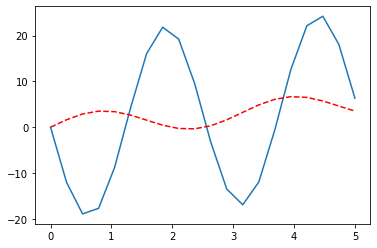

In [211]:
params = [1,2]
plt.plot(x, fx)
plt.plot(x,f(params,x),'r--')
plt.show()

In [222]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

#### Вариант решения через scipy minimize

In [196]:
from scipy.optimize import minimize

In [228]:
params=[-10,20]
res = minimize(error,params , method='nelder-mead', options={'xtol':1e-8, 'disp':True})

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 77
         Function evaluations: 153


In [229]:
res.final_simplex

(array([[3.00, 21.38],
        [3.00, 21.38],
        [3.00, 21.38]]),
 array([0.00, 0.00, 0.00]))

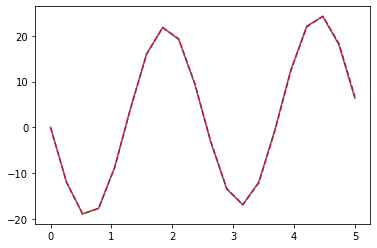

In [231]:
a,b = 3, 21.38
plt.plot(x, fx)
plt.plot(x,f(x,a,b),'r--')
plt.show()

Совпадение с кривой.

#### Градиентный бустинг

In [138]:
from scipy.optimize import approx_fprime

In [235]:
def f_modified(ab, x):
    return np.e**ab[0] * np.sin(ab[1]*x) + x

In [258]:
learning_rate = 1
accuracy = 0.1
eps = np.sqrt(np.finfo(float).eps)
params = [1,2]


print('Loss function \t|\t gradient: \t|\t params coordinates:')
print('-'*55)

for i in range(1,10,1):
    #first iteration
    abs_error = error(params)
    grad = approx_fprime( params, error, eps)
    print(f'{abs_error:.2f}\t|\t{grad}\t|\t{params}')
    
    #grad boost
    params = params - learning_rate*grad
    
    #stop criteria
    if abs_error < accuracy: 
        print('-'*55)
        print(f'Total iterations = {i}') 
        break
        
print('-'*55)
print("Минимум достигается в: ", params)
print("Значение ошибки в минимуме: %.2f" % error(params))
        

Loss function 	|	 gradient: 	|	 params coordinates:
-------------------------------------------------------
254.20	|	[9.69 87.61]	|	[1, 2]
244.51	|	[-0.00 -0.00]	|	[-8.69 -85.61]
244.51	|	[-0.00 -0.00]	|	[-8.69 -85.61]
244.51	|	[-0.00 -0.00]	|	[-8.69 -85.61]
244.51	|	[-0.00 -0.00]	|	[-8.69 -85.61]
244.51	|	[-0.00 -0.00]	|	[-8.69 -85.61]
244.51	|	[-0.00 -0.00]	|	[-8.69 -85.61]
244.51	|	[-0.00 -0.00]	|	[-8.69 -85.61]
244.51	|	[-0.00 -0.00]	|	[-8.69 -85.61]
-------------------------------------------------------
Минимум достигается в:  [-8.69 -85.61]
Значение ошибки в минимуме: 244.51


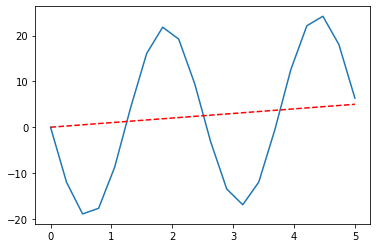

In [260]:
plt.plot(x, fx)
plt.plot(x,f_modified(params,x),'r--')
plt.show()

Градиентный бустинг не проходит. 

Функция потерь: L = fx - f(a,b). Функция потерь получает точку  (х = х0 в t-мерном пространстве, где t=len(x) ).
Предполагаю, что градиент не находит минимум для функции sin().

#### Фреймворк 'optuna' + перебор всех возможных вариантов

In [305]:
def objective(trial):
    params[0] = trial.suggest_uniform('params[0]', -10, 10)
    params[1] = trial.suggest_uniform('params[1]', -10, 10)
    return error(params)

study = optuna.create_study()
study.optimize(objective, n_trials=1000)

study.best_params

[I 2021-06-18 19:01:57,163] A new study created in memory with name: no-name-9d82437f-805b-43bf-a65d-feac7b27d3af
[I 2021-06-18 19:01:57,163] Trial 0 finished with value: 244.50956431389145 and parameters: {'params[0]': -4.727308781177689, 'params[1]': -4.74699877769345}. Best is trial 0 with value: 244.50956431389145.
[I 2021-06-18 19:01:57,163] Trial 1 finished with value: 2766.1256548412284 and parameters: {'params[0]': 5.406079047961352, 'params[1]': -6.252227802176273}. Best is trial 0 with value: 244.50956431389145.
[I 2021-06-18 19:01:57,173] Trial 2 finished with value: 540.3962578223598 and parameters: {'params[0]': 3.720917320421268, 'params[1]': 6.859748866689703}. Best is trial 0 with value: 244.50956431389145.
[I 2021-06-18 19:01:57,173] Trial 3 finished with value: 244.50954864954332 and parameters: {'params[0]': -8.255944507293954, 'params[1]': -9.485851601737888}. Best is trial 3 with value: 244.50954864954332.
[I 2021-06-18 19:01:57,173] Trial 4 finished with value: 13

[I 2021-06-18 19:01:57,663] Trial 37 finished with value: 246.228754782358 and parameters: {'params[0]': -0.15994790033059636, 'params[1]': 0.8045733439933209}. Best is trial 36 with value: 233.0387360121334.
[I 2021-06-18 19:01:57,683] Trial 38 finished with value: 365.81651570974554 and parameters: {'params[0]': 3.782305391977488, 'params[1]': -2.707102205006406}. Best is trial 36 with value: 233.0387360121334.
[I 2021-06-18 19:01:57,713] Trial 39 finished with value: 244.65128795992345 and parameters: {'params[0]': -4.142335648140235, 'params[1]': 2.704454428256837}. Best is trial 36 with value: 233.0387360121334.
[I 2021-06-18 19:01:57,723] Trial 40 finished with value: 243.64177743785137 and parameters: {'params[0]': 0.3394140749742114, 'params[1]': -3.7175790017423354}. Best is trial 36 with value: 233.0387360121334.
[I 2021-06-18 19:01:57,743] Trial 41 finished with value: 232.06255713802952 and parameters: {'params[0]': 1.2799921076065641, 'params[1]': -7.37505140047479}. Best 

[I 2021-06-18 19:01:58,393] Trial 74 finished with value: 253.360727536559 and parameters: {'params[0]': 1.5365818519515808, 'params[1]': -8.484756655618398}. Best is trial 51 with value: 229.42860531405373.
[I 2021-06-18 19:01:58,423] Trial 75 finished with value: 244.48956997029467 and parameters: {'params[0]': 2.3657786956588365, 'params[1]': -9.404993928363963}. Best is trial 51 with value: 229.42860531405373.
[I 2021-06-18 19:01:58,443] Trial 76 finished with value: 243.85181789060715 and parameters: {'params[0]': -1.3138638471152693, 'params[1]': -7.7558096963662635}. Best is trial 51 with value: 229.42860531405373.
[I 2021-06-18 19:01:58,473] Trial 77 finished with value: 241.64814651807794 and parameters: {'params[0]': 1.1572812014044525, 'params[1]': -3.952731136362177}. Best is trial 51 with value: 229.42860531405373.
[I 2021-06-18 19:01:58,493] Trial 78 finished with value: 244.49150465504798 and parameters: {'params[0]': -3.587059441184029, 'params[1]': -6.966091204897202}.

[I 2021-06-18 19:01:59,105] Trial 111 finished with value: 237.48462764852627 and parameters: {'params[0]': -0.03474427450215667, 'params[1]': -2.11815794569714}. Best is trial 51 with value: 229.42860531405373.
[I 2021-06-18 19:01:59,115] Trial 112 finished with value: 239.84722954591246 and parameters: {'params[0]': 1.7227038270245858, 'params[1]': -0.748324325226071}. Best is trial 51 with value: 229.42860531405373.
[I 2021-06-18 19:01:59,135] Trial 113 finished with value: 251.28490412726566 and parameters: {'params[0]': 1.7465191498487371, 'params[1]': -1.841920494173198}. Best is trial 51 with value: 229.42860531405373.
[I 2021-06-18 19:01:59,155] Trial 114 finished with value: 240.86537058185752 and parameters: {'params[0]': -1.1295339563011901, 'params[1]': -2.2890064257856824}. Best is trial 51 with value: 229.42860531405373.
[I 2021-06-18 19:01:59,165] Trial 115 finished with value: 247.9076221259357 and parameters: {'params[0]': -0.3513067798624312, 'params[1]': -1.591214749

[I 2021-06-18 19:01:59,755] Trial 148 finished with value: 16.987786593204312 and parameters: {'params[0]': 2.9600439056615264, 'params[1]': -2.4789715117030626}. Best is trial 148 with value: 16.987786593204312.
[I 2021-06-18 19:01:59,765] Trial 149 finished with value: 244.00536646792742 and parameters: {'params[0]': 2.8434720812953764, 'params[1]': -2.9440574249089795}. Best is trial 148 with value: 16.987786593204312.
[I 2021-06-18 19:01:59,785] Trial 150 finished with value: 976.0327787911158 and parameters: {'params[0]': 4.527946019337188, 'params[1]': -2.2998575292123467}. Best is trial 148 with value: 16.987786593204312.
[I 2021-06-18 19:01:59,805] Trial 151 finished with value: 393.93371675831196 and parameters: {'params[0]': 3.10327991966223, 'params[1]': -1.5893792828765732}. Best is trial 148 with value: 16.987786593204312.
[I 2021-06-18 19:01:59,815] Trial 152 finished with value: 632.2286340618265 and parameters: {'params[0]': 3.8111911504143983, 'params[1]': -3.480323778

[I 2021-06-18 19:02:00,445] Trial 185 finished with value: 370.854865110595 and parameters: {'params[0]': 3.160947272411808, 'params[1]': -3.218562542801692}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:00,475] Trial 186 finished with value: 482.08507612653636 and parameters: {'params[0]': 3.641301576722271, 'params[1]': -1.206457803175037}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:00,495] Trial 187 finished with value: 179.86877758335544 and parameters: {'params[0]': 1.6815080801546187, 'params[1]': -2.421822465741477}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:00,515] Trial 188 finished with value: 284.315092123701 and parameters: {'params[0]': 2.5556232182397305, 'params[1]': -3.638239024586967}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:00,525] Trial 189 finished with value: 299.0027445749455 and parameters: {'params[0]': 3.035139463877591, 'params[1]': -1.9161327608043202

[I 2021-06-18 19:02:01,241] Trial 222 finished with value: 143.840116648349 and parameters: {'params[0]': 2.321796699719704, 'params[1]': -2.6482519033159027}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:01,261] Trial 223 finished with value: 233.7941894458304 and parameters: {'params[0]': 3.1225731191830812, 'params[1]': -2.1046951042893385}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:01,276] Trial 224 finished with value: 88.40054570387525 and parameters: {'params[0]': 2.5982083955872035, 'params[1]': -2.5558281730733796}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:01,291] Trial 225 finished with value: 266.5152626739621 and parameters: {'params[0]': 2.6807599911203326, 'params[1]': -3.0777734467836266}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:01,311] Trial 226 finished with value: 172.09413493165857 and parameters: {'params[0]': 3.3535613612521322, 'params[1]': -2.6643392464

[I 2021-06-18 19:02:01,951] Trial 259 finished with value: 909.1620783307625 and parameters: {'params[0]': 4.175823905161772, 'params[1]': -1.6246054069824}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:01,981] Trial 260 finished with value: 138.8074810085905 and parameters: {'params[0]': 2.815147965809508, 'params[1]': -2.2599293362482413}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:01,991] Trial 261 finished with value: 268.97834153459513 and parameters: {'params[0]': 2.936705140465938, 'params[1]': -2.9944224317800976}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:02,011] Trial 262 finished with value: 364.6385641039562 and parameters: {'params[0]': 3.448243063658164, 'params[1]': -2.004361763297896}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:02,031] Trial 263 finished with value: 79.41711595314476 and parameters: {'params[0]': 3.1509359383319646, 'params[1]': -2.410412845523945}

[I 2021-06-18 19:02:02,691] Trial 296 finished with value: 402.0653102874107 and parameters: {'params[0]': 3.216990331226631, 'params[1]': -3.369767800878654}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:02,721] Trial 297 finished with value: 2201.810190424564 and parameters: {'params[0]': 5.23972195243115, 'params[1]': -1.9887112595527943}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:02,731] Trial 298 finished with value: 64.59549950042518 and parameters: {'params[0]': 2.690499372536542, 'params[1]': -2.495262216127623}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:02,751] Trial 299 finished with value: 328.16402335989216 and parameters: {'params[0]': 2.6915960065956877, 'params[1]': -1.6362409965943825}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:02,771] Trial 300 finished with value: 592.3734728884538 and parameters: {'params[0]': 3.827344564550738, 'params[1]': -1.124015087331075

[I 2021-06-18 19:02:03,451] Trial 333 finished with value: 365.38130721657996 and parameters: {'params[0]': 3.127559560892556, 'params[1]': -1.3903732913307938}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:03,471] Trial 334 finished with value: 616.4839093241791 and parameters: {'params[0]': 4.175240633612375, 'params[1]': -2.704031803039094}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:03,491] Trial 335 finished with value: 270.2015032486282 and parameters: {'params[0]': 2.5157483061706944, 'params[1]': -3.1410298342052827}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:03,511] Trial 336 finished with value: 226.0291030456328 and parameters: {'params[0]': 3.4634173674115254, 'params[1]': -2.3046051359477944}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:03,531] Trial 337 finished with value: 1791.7221978702985 and parameters: {'params[0]': 4.9357913179370065, 'params[1]': -1.7964587139

[I 2021-06-18 19:02:04,241] Trial 370 finished with value: 716.2656708647871 and parameters: {'params[0]': 3.9069630848198855, 'params[1]': -1.6563361400215655}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:04,261] Trial 371 finished with value: 374.79453475543517 and parameters: {'params[0]': 3.263985143991838, 'params[1]': -4.787026193315434}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:04,281] Trial 372 finished with value: 271.9392611142756 and parameters: {'params[0]': 2.7640560088873336, 'params[1]': -3.075926656346158}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:04,301] Trial 373 finished with value: 132.31513349824067 and parameters: {'params[0]': 2.280144340489845, 'params[1]': -2.5666403126507795}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:04,321] Trial 374 finished with value: 413.20036213051435 and parameters: {'params[0]': 3.473797125643611, 'params[1]': -3.88266452335

[I 2021-06-18 19:02:05,031] Trial 407 finished with value: 427.077282170674 and parameters: {'params[0]': 3.2413402589515052, 'params[1]': -1.5996468119514735}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:05,051] Trial 408 finished with value: 447.96992870376744 and parameters: {'params[0]': 3.5652267303638214, 'params[1]': -3.1074741562758303}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:05,071] Trial 409 finished with value: 98.46656321738887 and parameters: {'params[0]': 2.8778948052662865, 'params[1]': -2.3425569482363793}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:05,091] Trial 410 finished with value: 166.03731233579538 and parameters: {'params[0]': 2.1661840976281352, 'params[1]': -2.6923076218166786}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:05,111] Trial 411 finished with value: 882.6185000766579 and parameters: {'params[0]': 4.260534840111551, 'params[1]': 9.9589177806

[I 2021-06-18 19:02:05,832] Trial 444 finished with value: 178.38515410980028 and parameters: {'params[0]': 2.0249986958857935, 'params[1]': -2.7111075723254823}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:05,862] Trial 445 finished with value: 305.7302936000587 and parameters: {'params[0]': 2.6395473544248302, 'params[1]': -1.7536469127049434}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:05,882] Trial 446 finished with value: 368.18356654725693 and parameters: {'params[0]': 3.286895051389066, 'params[1]': -3.124202035092101}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:05,912] Trial 447 finished with value: 146.26174063987594 and parameters: {'params[0]': 2.375804052650174, 'params[1]': -2.306934941571746}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:05,932] Trial 448 finished with value: 363.28849438157573 and parameters: {'params[0]': 3.6266286187796544, 'params[1]': -2.814153067

[I 2021-06-18 19:02:06,672] Trial 481 finished with value: 602.9793085101062 and parameters: {'params[0]': 4.025287193778876, 'params[1]': -2.0829861488862225}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:06,692] Trial 482 finished with value: 243.89648152027746 and parameters: {'params[0]': 2.46393723743658, 'params[1]': -3.0058667738759937}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:06,712] Trial 483 finished with value: 244.68539046260483 and parameters: {'params[0]': -3.2654549007092264, 'params[1]': -1.505487072115408}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:06,732] Trial 484 finished with value: 212.38789044876108 and parameters: {'params[0]': 3.559473291955226, 'params[1]': -2.6105493810865825}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:06,752] Trial 485 finished with value: 224.14450392821763 and parameters: {'params[0]': 2.843887770548808, 'params[1]': -2.0665325315

[I 2021-06-18 19:02:07,502] Trial 518 finished with value: 464.8855086992418 and parameters: {'params[0]': 3.729142982212717, 'params[1]': -2.0272710489152566}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:07,532] Trial 519 finished with value: 81.48814501447761 and parameters: {'params[0]': 2.613528498537764, 'params[1]': -2.526550197252136}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:07,552] Trial 520 finished with value: 134.4384177798912 and parameters: {'params[0]': 2.2212773262867147, 'params[1]': -2.527156392843986}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:07,572] Trial 521 finished with value: 298.3350577919637 and parameters: {'params[0]': 2.5677199428222397, 'params[1]': -3.346256840762829}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:07,592] Trial 522 finished with value: 238.6200034382261 and parameters: {'params[0]': 1.9307010012656112, 'params[1]': -0.96595786849661

[I 2021-06-18 19:02:08,402] Trial 555 finished with value: 356.39804346419817 and parameters: {'params[0]': 2.96707340218557, 'params[1]': -1.7064318965338827}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:08,432] Trial 556 finished with value: 107.42379292910397 and parameters: {'params[0]': 2.47161893549825, 'params[1]': -2.4254553649549653}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:08,452] Trial 557 finished with value: 241.7937375024099 and parameters: {'params[0]': 3.3188237382139616, 'params[1]': -2.782515197331628}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:08,482] Trial 558 finished with value: 555.7357432205723 and parameters: {'params[0]': 3.903081647693118, 'params[1]': -2.0248970674748357}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:08,502] Trial 559 finished with value: 261.4761845590878 and parameters: {'params[0]': 2.8934596243454487, 'params[1]': -0.9093320986861

[I 2021-06-18 19:02:09,332] Trial 592 finished with value: 264.0519376643965 and parameters: {'params[0]': 2.2792689977712013, 'params[1]': 5.939452207236612}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:09,357] Trial 593 finished with value: 311.18929785417777 and parameters: {'params[0]': 2.5953638466846525, 'params[1]': -1.483500359520887}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:09,377] Trial 594 finished with value: 93.90211893009892 and parameters: {'params[0]': 3.3248379011544764, 'params[1]': -2.5171998935663167}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:09,397] Trial 595 finished with value: 324.417067108394 and parameters: {'params[0]': 2.938125862819995, 'params[1]': -3.2181922345645573}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:09,432] Trial 596 finished with value: 605.1607048751574 and parameters: {'params[0]': 3.946410008782984, 'params[1]': -1.97578853013282

[I 2021-06-18 19:02:10,442] Trial 629 finished with value: 212.2130851833049 and parameters: {'params[0]': 2.938965089539079, 'params[1]': -2.1007021970269655}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:10,462] Trial 630 finished with value: 74127.37039890447 and parameters: {'params[0]': 8.670687426804456, 'params[1]': -2.8735712604520756}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:10,502] Trial 631 finished with value: 154.6685345938662 and parameters: {'params[0]': 3.403059986290253, 'params[1]': -2.40385087045076}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:10,522] Trial 632 finished with value: 627.1056660460902 and parameters: {'params[0]': 3.9528598374115607, 'params[1]': -1.9144854374083784}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:10,552] Trial 633 finished with value: 283.36791561083186 and parameters: {'params[0]': 2.729252201978154, 'params[1]': -3.15744296857145

[I 2021-06-18 19:02:11,457] Trial 666 finished with value: 103.02804871567287 and parameters: {'params[0]': 2.492312224579039, 'params[1]': -2.4345963847425662}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:11,477] Trial 667 finished with value: 396.8026188862126 and parameters: {'params[0]': 3.383821604685118, 'params[1]': -3.1403611966926492}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:11,507] Trial 668 finished with value: 259.9252963671629 and parameters: {'params[0]': 2.9530772862720887, 'params[1]': -1.9967237566224847}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:11,527] Trial 669 finished with value: 566.7844601674174 and parameters: {'params[0]': 4.0904349272858385, 'params[1]': -2.7290651240806487}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:11,557] Trial 670 finished with value: 143.67428720741026 and parameters: {'params[0]': 2.652903614353196, 'params[1]': -2.2551902597

[I 2021-06-18 19:02:12,427] Trial 703 finished with value: 277.39132176409646 and parameters: {'params[0]': 2.1811371474839736, 'params[1]': -3.4089591855247514}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:12,457] Trial 704 finished with value: 152.57296779050705 and parameters: {'params[0]': 2.5898939627738358, 'params[1]': -2.719119589261566}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:12,487] Trial 705 finished with value: 229.2692780976607 and parameters: {'params[0]': 3.1114563036255585, 'params[1]': -2.1099604212262224}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:12,517] Trial 706 finished with value: 405.36925623097517 and parameters: {'params[0]': 3.4434863405526865, 'params[1]': -3.103522922519039}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:12,547] Trial 707 finished with value: 274.7601681809352 and parameters: {'params[0]': 2.6935551090893006, 'params[1]': -1.22040386

[I 2021-06-18 19:02:13,587] Trial 740 finished with value: 439.60353266519417 and parameters: {'params[0]': 3.5485162316282173, 'params[1]': -1.0180643474246345}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:13,617] Trial 741 finished with value: 227.91095434336847 and parameters: {'params[0]': 2.6427273689117317, 'params[1]': -2.9247787468333306}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:13,637] Trial 742 finished with value: 384.78208872848404 and parameters: {'params[0]': 3.209321477419459, 'params[1]': -1.4021345696811878}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:13,662] Trial 743 finished with value: 411.2614437747803 and parameters: {'params[0]': 3.989744639693487, 'params[1]': -2.5051537864023214}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:13,692] Trial 744 finished with value: 244.21031502636657 and parameters: {'params[0]': 2.307741313735744, 'params[1]': -1.93342710

[I 2021-06-18 19:02:14,572] Trial 777 finished with value: 328.68922832248666 and parameters: {'params[0]': 3.686833478360139, 'params[1]': -2.284548916398332}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:14,592] Trial 778 finished with value: 869.3379593098705 and parameters: {'params[0]': 4.474302422218839, 'params[1]': -2.667150188718588}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:14,622] Trial 779 finished with value: 328.24048837560264 and parameters: {'params[0]': 2.9896084716403717, 'params[1]': -5.96784165475057}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:14,642] Trial 780 finished with value: 846.4013309155642 and parameters: {'params[0]': 4.100463948636995, 'params[1]': -1.6960540282394447}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:14,672] Trial 781 finished with value: 302.7490596311387 and parameters: {'params[0]': 3.0105419916771603, 'params[1]': -3.08829318727394

[I 2021-06-18 19:02:15,582] Trial 814 finished with value: 44.3757612830555 and parameters: {'params[0]': 3.137294609659329, 'params[1]': -2.5341998353882507}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:15,622] Trial 815 finished with value: 1198.6170472030155 and parameters: {'params[0]': 4.602868211248344, 'params[1]': -3.7433751431720834}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:15,652] Trial 816 finished with value: 524.478252582855 and parameters: {'params[0]': 3.895858194352969, 'params[1]': -2.8644585089493093}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:15,682] Trial 817 finished with value: 213.21035420240264 and parameters: {'params[0]': 3.6107236674782426, 'params[1]': -2.5685398622403937}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:15,702] Trial 818 finished with value: 404.73732107353874 and parameters: {'params[0]': 3.2957076942432404, 'params[1]': -3.21675158080

[I 2021-06-18 19:02:16,732] Trial 851 finished with value: 244.5307203308428 and parameters: {'params[0]': -1.2862997660603588, 'params[1]': -1.8822840040944908}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:16,762] Trial 852 finished with value: 170.7291018012881 and parameters: {'params[0]': 2.1075439872600934, 'params[1]': -2.2809724882660274}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:16,792] Trial 853 finished with value: 235.22076221032012 and parameters: {'params[0]': 2.719109242752786, 'params[1]': -2.939505305335417}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:16,822] Trial 854 finished with value: 284.80637442096133 and parameters: {'params[0]': 3.1156523019018874, 'params[1]': -0.9183680572985591}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:16,842] Trial 855 finished with value: 156.21829311166837 and parameters: {'params[0]': 3.4388618341070405, 'params[1]': -2.5873082

[I 2021-06-18 19:02:17,888] Trial 888 finished with value: 307.96104592103876 and parameters: {'params[0]': 2.9353906546176534, 'params[1]': -1.2794243933386884}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:17,918] Trial 889 finished with value: 435.6045203216448 and parameters: {'params[0]': 3.336904443852501, 'params[1]': -3.378959022669246}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:17,948] Trial 890 finished with value: 594.0357648037811 and parameters: {'params[0]': 4.0821816003714435, 'params[1]': -2.205953398596}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:17,978] Trial 891 finished with value: 148.45303078953043 and parameters: {'params[0]': 2.5907945296593207, 'params[1]': -2.709213479003355}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:18,008] Trial 892 finished with value: 491.5185434501535 and parameters: {'params[0]': 3.5215499296781685, 'params[1]': -1.77279248598643

[I 2021-06-18 19:02:19,034] Trial 925 finished with value: 394.88487873083966 and parameters: {'params[0]': 3.254548245229648, 'params[1]': -1.7860782403616782}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:19,064] Trial 926 finished with value: 261.66718826304066 and parameters: {'params[0]': 3.5954993373048563, 'params[1]': -2.332912585577157}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:19,094] Trial 927 finished with value: 232.73823945271602 and parameters: {'params[0]': 2.9256601003955756, 'params[1]': -2.89963048603778}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:19,124] Trial 928 finished with value: 323.648538110952 and parameters: {'params[0]': 3.816476170883239, 'params[1]': -2.431285328540711}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:19,149] Trial 929 finished with value: 401.8841416114336 and parameters: {'params[0]': 3.2150506765349545, 'params[1]': -3.3144049633658

[I 2021-06-18 19:02:20,195] Trial 962 finished with value: 234.60976678666742 and parameters: {'params[0]': 3.1569446509761523, 'params[1]': -2.11544765249836}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:20,225] Trial 963 finished with value: 288.8302325086091 and parameters: {'params[0]': 2.727732500797752, 'params[1]': -1.2780743313189888}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:20,245] Trial 964 finished with value: 290.96325427415275 and parameters: {'params[0]': 3.7805317184802645, 'params[1]': -2.494100228696622}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:20,275] Trial 965 finished with value: 3056.1054729387365 and parameters: {'params[0]': 5.492215275755619, 'params[1]': -3.3810647025478535}. Best is trial 163 with value: 13.269781708837542.
[I 2021-06-18 19:02:20,305] Trial 966 finished with value: 380.4010153610837 and parameters: {'params[0]': 3.2060542959102736, 'params[1]': -1.79185796933

[I 2021-06-18 19:02:21,380] Trial 999 finished with value: 168.0033176872074 and parameters: {'params[0]': 2.104015333815438, 'params[1]': -2.295808889569325}. Best is trial 163 with value: 13.269781708837542.


{'params[0]': 3.050249997276545, 'params[1]': -2.5061245717984897}

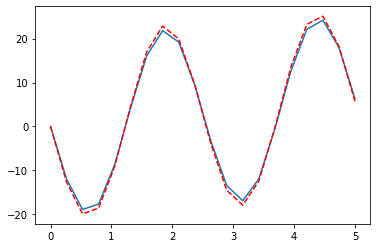

In [306]:
#посмотрим результат
params= [3.050249997276545, -2.5061245717984897]
plt.plot(x, fx)
plt.plot(x,f_modified(params,x),'r--')
plt.show()

Совпадает, но не так как у **scipy minimize**

#### Проверим эволюцию

In [307]:
from scipy.optimize import differential_evolution

In [314]:
#для эволюции поменяем функцию, чтобы искомый вектор был x. 
#Тогда текущие значения массива x, становятся точкой х0 в t-мерном (t=len(x) )пространстве

x0 = x
def error_modified(x):
    return np.sum(np.abs(fx - f(x0, x[0], x[1])))
error_modified([1,2])

254.198896237949

##### Фреймворк 'optuna' + подбор идеальных параметров

In [342]:
bounds = [[-30,30],[-30,30]]

def objective(trial):
    mutation_ = trial.suggest_uniform('mutation_', 0, 1.99)
    recombination_ = trial.suggest_uniform('recombination_', 0, 1)
    result = differential_evolution(error_modified, bounds, seed=42, popsize=1, tol=1e-9, 
                                atol=1e-9, mutation= mutation_, recombination=recombination_, 
                                updating='immediate', strategy='best1bin',polish=True)
    return result.fun

study = optuna.create_study()
study.optimize(objective, n_trials=100)

study.best_params

[I 2021-06-18 19:50:52,559] A new study created in memory with name: no-name-e6f6987c-fe8b-4c2a-8a0e-df514a7ac196
[I 2021-06-18 19:50:52,619] Trial 0 finished with value: 244.3674208950464 and parameters: {'mutation_': 0.8694760943642049, 'recombination_': 0.2762049546614638}. Best is trial 0 with value: 244.3674208950464.
[I 2021-06-18 19:50:52,679] Trial 1 finished with value: 214.83742638024202 and parameters: {'mutation_': 0.4454669694127114, 'recombination_': 0.6051333750813591}. Best is trial 1 with value: 214.83742638024202.
[I 2021-06-18 19:50:52,759] Trial 2 finished with value: 204.54268306929387 and parameters: {'mutation_': 0.5366789765129466, 'recombination_': 0.3719783736357084}. Best is trial 2 with value: 204.54268306929387.
[I 2021-06-18 19:50:52,839] Trial 3 finished with value: 17.621556429123554 and parameters: {'mutation_': 1.6763815986249215, 'recombination_': 0.2172522562402679}. Best is trial 3 with value: 17.621556429123554.
[I 2021-06-18 19:50:52,919] Trial 4 

[I 2021-06-18 19:50:55,792] Trial 35 finished with value: 1.620699862225905e-05 and parameters: {'mutation_': 1.5714073873461663, 'recombination_': 0.5664875647020725}. Best is trial 14 with value: 1.667798652960073e-06.
[I 2021-06-18 19:50:55,842] Trial 36 finished with value: 214.73463465947881 and parameters: {'mutation_': 0.5398841255511723, 'recombination_': 0.6596901589070802}. Best is trial 14 with value: 1.667798652960073e-06.
[I 2021-06-18 19:50:56,012] Trial 37 finished with value: 70.08319805192089 and parameters: {'mutation_': 1.7814487822359282, 'recombination_': 0.42432251200423}. Best is trial 14 with value: 1.667798652960073e-06.
[I 2021-06-18 19:50:56,092] Trial 38 finished with value: 232.95862017913515 and parameters: {'mutation_': 0.8631270627775278, 'recombination_': 0.5344662724806977}. Best is trial 14 with value: 1.667798652960073e-06.
[I 2021-06-18 19:50:56,182] Trial 39 finished with value: 183.66326930364124 and parameters: {'mutation_': 0.40038346007754405, 

[I 2021-06-18 19:50:58,963] Trial 71 finished with value: 1.61748933384942e-05 and parameters: {'mutation_': 1.450055463754675, 'recombination_': 0.7247723437115701}. Best is trial 14 with value: 1.667798652960073e-06.
[I 2021-06-18 19:50:59,035] Trial 72 finished with value: 214.57232765393442 and parameters: {'mutation_': 1.731522394916965, 'recombination_': 0.9286430241768189}. Best is trial 14 with value: 1.667798652960073e-06.
[I 2021-06-18 19:50:59,149] Trial 73 finished with value: 187.5689103796301 and parameters: {'mutation_': 1.3010826298117057, 'recombination_': 0.6882651962314905}. Best is trial 14 with value: 1.667798652960073e-06.
[I 2021-06-18 19:50:59,211] Trial 74 finished with value: 1.3313504457101999e-05 and parameters: {'mutation_': 1.3902730462575839, 'recombination_': 0.633850675743081}. Best is trial 14 with value: 1.667798652960073e-06.
[I 2021-06-18 19:50:59,275] Trial 75 finished with value: 214.51033002667472 and parameters: {'mutation_': 1.543387236479993, 

{'mutation_': 1.13973939955462, 'recombination_': 0.43492652845413493}

In [345]:
# подставляем значения из optuna: {'mutation_': 1.13973939955462, 'recombination_': 0.43492652845413493}
bounds = [[-30,30],[-30,30]]
result = differential_evolution(error_modified, bounds, seed=42, popsize=1, tol=1e-9, 
                                atol=1e-9, mutation= 1.13973939955462, recombination=0.43492652845413493, 
                                updating='immediate', strategy='best1bin',polish=True)
result

     fun: 1.5107396649227667e-06
     jac: array([140.49, 502.68])
 message: 'Optimization terminated successfully.'
    nfev: 872
     nit: 144
 success: True
       x: array([3.00, -2.50])

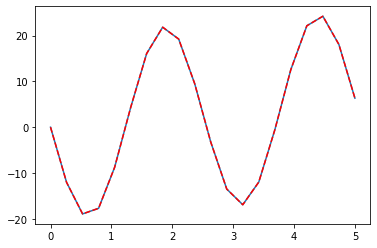

In [346]:
#посмотрим результат
params = result.x
plt.plot(x0, fx)
plt.plot(x0,f_modified(params),'r--')
plt.show()

#### Плавка (basinhooping)

In [347]:
from scipy.optimize import basinhopping

In [351]:
res = basinhopping(error_modified, [1,2], minimizer_kwargs={'method': 'BFGS'}, niter = 50)
res

                        fun: 1.6214307976269993e-06
 lowest_optimization_result:       fun: 1.6214307976269993e-06
 hess_inv: array([[0.00, 0.00],
       [0.00, 0.00]])
      jac: array([124.07, 560.39])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 180
      nit: 24
     njev: 56
   status: 2
  success: False
        x: array([3.00, -2.50])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 201
                       nfev: 58402
                        nit: 200
                       njev: 18709
                          x: array([3.00, -2.50])

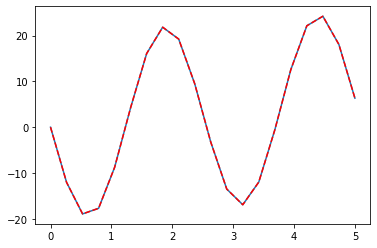

In [353]:
#посмотрим результат
params = res.x
plt.plot(x0, fx)
plt.plot(x0,f_modified(params),'r--')
plt.show()

#### Вывод: 
Проверили все изученные методы нахождения параметоров. Лучшие результаты показали методы:
- **scipy minimize nelder-mead**
- **basinhooping**
- **differential_evolution**

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [355]:
from scipy.stats import *

In [356]:
#Создайте свою дискретную случайную величину с не менее, чем 20 значениями.
x = binom.rvs(100, 0.53, size= 100)
probabilities = np.random.random(100)
probabilities = probabilities / probabilities.sum()

np.random.choice(x,20 ,p=probabilities)

array([58, 52, 58, 51, 40, 40, 59, 51, 56, 54, 56, 55, 48, 53, 55, 51, 53,
       59, 48, 50])

In [361]:
# Сгенерируйте 1000 выборок размера 50. 
# Посчитайте среднее для каждой выборки. 
# Постройте гистограмму распределения средних.
n = 50

rv = expon(0)       #Экспоненциальное распределение
#rv = sts.norm(loc = 1, scale = 1) # Можно исплользовать любое. Например Стьюдента

samples_count = 1000    #1000 Экземпляров
a = np.array([])        # Массив для сохранения средних по выборкам
    
for number in range(samples_count):
    # На каждом цикле генерируем выборки размера 50
    sample = rv.rvs(size=n)

    # Считаем среднее по каждой выборке и добавляем в массив средних
    a = np.append(a, sample.mean())

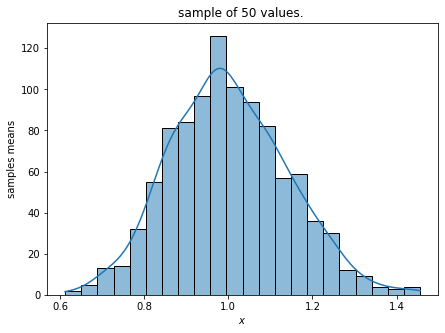

In [363]:
# гистограмма распределения средних

fig = plt.figure(figsize=(7,5))


#plt.hist(a[i-1,:], density=True,bins=30, label=label_i)
sns.histplot(a,kde=True)
plt.title('sample of 50 values. ')
plt.ylabel('samples means')
plt.xlabel('$x$');


## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



In [364]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [365]:
# найдем собственный вектор(ню) и собственное значение (лямбда)
lambda_, nu  = np.linalg.eig(m)
lambda_, nu

(array([3.00, -1.00]),
 array([[0.89, -0.89],
        [0.45, 0.45]]))

In [366]:
# проверка  A*nu = nu*lambda
for i in range(len(m)):
    left_ = m[:,:] @ nu[:,i]
    right_ = lambda_[i] * nu[:,i]
    print( f'm * nu[:,{i}] = {left_},\nlambda_[{i}] * nu[:,{i}] = {right_}   ')

m * nu[:,0] = [2.68 1.34],
lambda_[0] * nu[:,0] = [2.68 1.34]   
m * nu[:,1] = [0.89 -0.45],
lambda_[1] * nu[:,1] = [0.89 -0.45]   


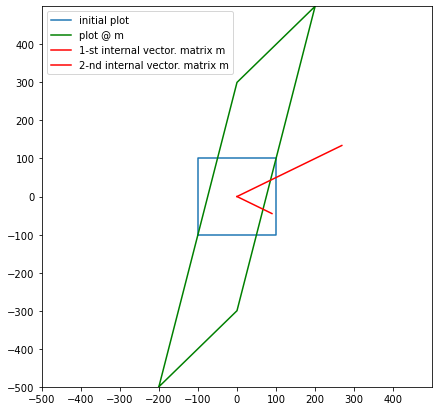

In [380]:
# визуализируем для наглядности. для примера возьмем квадрат со стороной 200
plt.figure(figsize=(7,7))
A = [
[-100, -100],
[-100, 100],
[100, 100],
[100, -100],
[-100, -100]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]
# исходный квадрат
plt.plot(x, y, label = 'initial plot')

#умножение на матрицу m (зеленым)
C = A @ m

x_1 = C[:,0]
y_1 = C[:,1]

plt.plot(x_1, y_1, color = 'green', label = 'plot @ m')

#новая система координат (красным) на базисе собственных векторов матрицы m
C = np.array(nu[:,0]) * lambda_[0] * 100
C.resize(2,2)
x_1 = C[:,0]
y_1 = C[:,1]
plt.plot(x_1, y_1, color = 'red', label = '1-st internal vector. matrix m')

C = np.array(nu[:,1]) * lambda_[1] * 100
C.resize(2,2)
x_1 = C[:,0]
y_1 = C[:,1]
plt.plot(x_1, y_1, color = 'red', label = '2-nd internal vector. matrix m')

plt.legend()
plt.xlim([-500,500])
plt.ylim([-500,500])
plt.xticks(range(-500,500,100))
plt.yticks(range(-500,500,100));